- Nama    = Muhammad Irfan Lazuardi Aziz,
- Alamat = Kota Tangerang Selatan, Banten

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Unzip File Location
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-05 06:39:05--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  4.39MB/s    in 67s     

2021-07-05 06:40:13 (4.58 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import zipfile, os

In [ ]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r'
          )
zip_ref.extractall('/tmp'
          )
zip_ref.close()
base_dir = '/tmp/rockpaperscissors/rps-cv-images'


In [ ]:
os.listdir(base_dir)

['paper', 'scissors', 'rock', 'README_rpc-cv-images.txt']

In [ ]:
#Separating Files into Two Location (60% on Training, 40% on Validation)
train_datagen = ImageDataGenerator(
    rescale=1./300,
    rotation_range=30,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.4
)
test_datagen = ImageDataGenerator(
    rescale=1./300, 
    rotation_range = 30, 
    horizontal_flip=True, 
    validation_split = 0.4
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    shuffle=True,
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    shuffle=True,
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
#Training model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=15,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2,
)

Epoch 1/15
15/15 - 17s - loss: 1.1133 - accuracy: 0.3250 - val_loss: 1.0762 - val_accuracy: 0.4313
Epoch 2/15
15/15 - 15s - loss: 1.0213 - accuracy: 0.4625 - val_loss: 0.9079 - val_accuracy: 0.5250
Epoch 3/15
15/15 - 15s - loss: 0.8004 - accuracy: 0.6771 - val_loss: 0.8931 - val_accuracy: 0.6125
Epoch 4/15
15/15 - 15s - loss: 0.6364 - accuracy: 0.7563 - val_loss: 0.4533 - val_accuracy: 0.8313
Epoch 5/15
15/15 - 14s - loss: 0.4021 - accuracy: 0.8422 - val_loss: 0.4104 - val_accuracy: 0.8562
Epoch 6/15
15/15 - 14s - loss: 0.4284 - accuracy: 0.8289 - val_loss: 0.3529 - val_accuracy: 0.8750
Epoch 7/15
15/15 - 15s - loss: 0.4230 - accuracy: 0.8438 - val_loss: 0.3262 - val_accuracy: 0.8938
Epoch 8/15
15/15 - 15s - loss: 0.3466 - accuracy: 0.8792 - val_loss: 0.3462 - val_accuracy: 0.9062
Epoch 9/15
15/15 - 15s - loss: 0.2698 - accuracy: 0.8958 - val_loss: 0.3743 - val_accuracy: 0.8562
Epoch 10/15
15/15 - 15s - loss: 0.3221 - accuracy: 0.8875 - val_loss: 0.2626 - val_accuracy: 0.9062
Epoch 11/

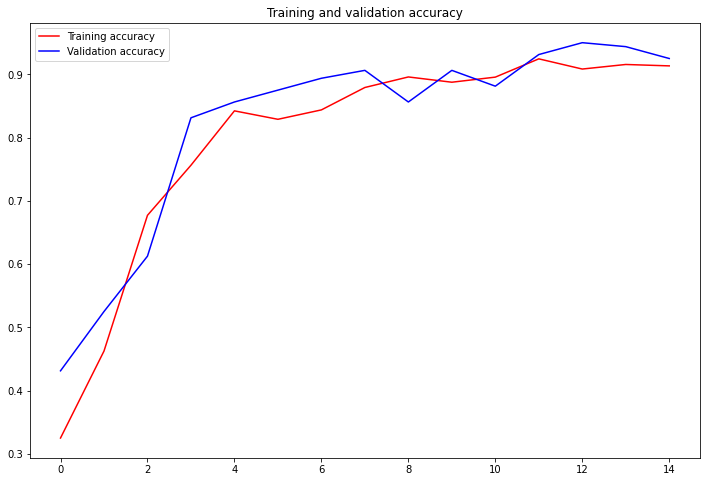

In [ ]:
#Testing Training and Validation's Accuracy
import matplotlib.pyplot as plt

accur = history.history['accuracy']
val_accur = history.history['val_accuracy'] 
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accur))

plt.figure(figsize=(12,8))
plt.plot(epochs, accur, 'r', label='Training accuracy')
plt.plot(epochs, val_accur, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.show()

In [ ]:
#Implementation
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Saving 1.jpg to 1.jpg
1.jpg
scissors


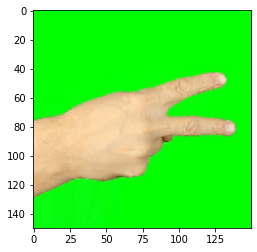

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150,150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    print(fn)
    if classes[0][0] == 1:
        print('paper')
    elif classes[0][1] == 1:
        print('rock')
    elif classes[0][2] == 1:
        print('scissors')